In [34]:

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import numpy as np
import pickle
import os.path
import math
import os

Populating the interactive namespace from numpy and matplotlib


Load MNIST handwritten digits dataset and display an example for each.

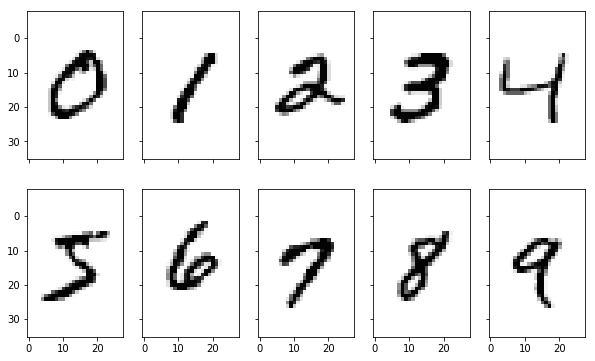

In [35]:
mnist = fetch_mldata("MNIST original")
X, y = mnist.data / 255., mnist.target
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

In [3]:
def mlp_store_name(hidden_units):
    directory = "storedClassifiers"
    name = "MLP_MNIST_"
    for i in hidden_units:
        name += str(i)
        name += "-"
    name = name[:-1]
    name += "_hiddenUnits_Solverlbfgs.p"
    return os.path.join(directory,name)

def run_MLP_on_MNIST(hidden_units=(50,), print_output=True):
    """
    Runs a multilayer perceptron with hidden layers specified by hidden_units
    on the MNIST handwritten digits dataset and calculates training and
    test accuracy.
    """

    if os.path.isfile(mlp_store_name(hidden_units)):
        if (print_output):
            print("loading clf from pickle file")
        clf = pickle.load(open(mlp_store_name(hidden_units), "rb" ))
    else:
        if (print_output):
            print("training classifier for " + str(hidden_units))
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=hidden_units, random_state=1)
        clf.fit(X_train, y_train)
        pickle.dump( clf, open( mlp_store_name(hidden_units), "wb" ) )
    if (print_output):
        print("Results for classfier with hidden units", str(hidden_units))
        print("Training set accuracy: %f" % clf.score(X_train, y_train))
        print("Test set accuracy: %f \n" % clf.score(X_test, y_test))
    return clf



In [37]:
def print_misclassifications(clf, no_of_images=20):
    """
    Print a few examples of misclassified images
    """
    
    y_test_pred = clf.predict(X_test)
    
    misclassified = X_test[y_test != y_test_pred][:no_of_images]
    true_labels = y_test[y_test != y_test_pred][:no_of_images]
    predicted_labels = y_test_pred[y_test != y_test_pred][:no_of_images]
    
    fig, ax = plt.subplots(nrows=int(math.ceil(no_of_images/5)), ncols=5, sharex=True, sharey=True,)
    ax = ax.flatten()
    for i in range(no_of_images):
        img = misclassified[i].reshape(28, 28)
        ax[i].imshow(img, cmap='Greys', interpolation='nearest')
        ax[i].set_title('%d) t: %d p: %d' % (i+1, true_labels[i], predicted_labels[i]))
    
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
    plt.show()


loading clf from pickle file
Results for classfier with hidden units (50,)
Training set accuracy: 0.995717
Test set accuracy: 0.995900 



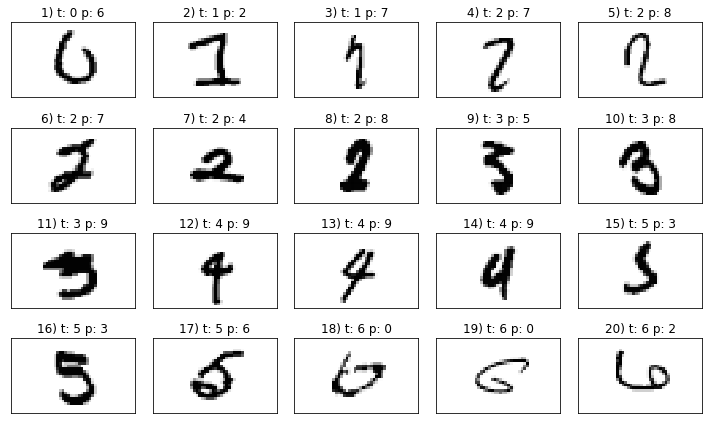

In [41]:
mlpClassifier50=run_MLP_on_MNIST((50,))
print_misclassifications(mlpClassifier50)

In [30]:
### Compare different layer depths for the same # of neurons ###
hidden_unit_ints=[6,12,18,24,30,36,48,60,96]
hidden_unit_numbers={}              

for number_of_layers in range(1,3+1):
    hidden_units_tuple_list=[]
    for total_hd_un in hidden_unit_ints:
        hidden_units_tuple=()
        for layer in range(1,number_of_layers+1):
            hidden_units_tuple += (int(total_hd_un/number_of_layers),)
        hidden_units_tuple_list.append(hidden_units_tuple)
    key=str(number_of_layers) + "_hidden_layers"
    hidden_unit_numbers[key]=hidden_units_tuple_list

training_accuracies={key : list([]) for key in hidden_unit_numbers.keys()}
test_accuracies={key : list([]) for key in hidden_unit_numbers.keys()}
del_accuracies={key : list([]) for key in hidden_unit_numbers.keys()}
for hd_key in hidden_unit_numbers:
    for hd_tuple in hidden_unit_numbers[hd_key]:
        clf=run_MLP_on_MNIST(hd_tuple, False)
        training_accuracies[hd_key].append(clf.score(X_train, y_train))
        test_accuracies[hd_key].append(clf.score(X_test, y_test))
        d_accuracy=clf.score(X_train, y_train)-clf.score(X_test, y_test)
        del_accuracies[hd_key].append(d_accuracy)


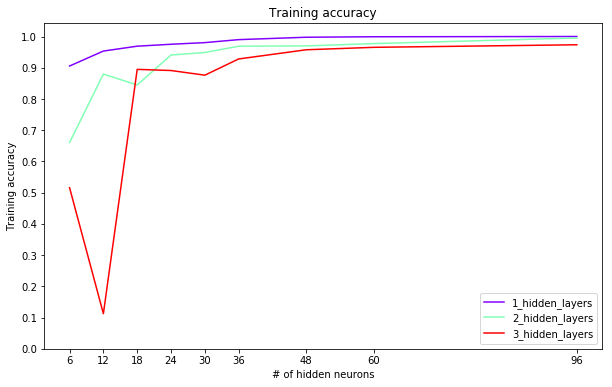

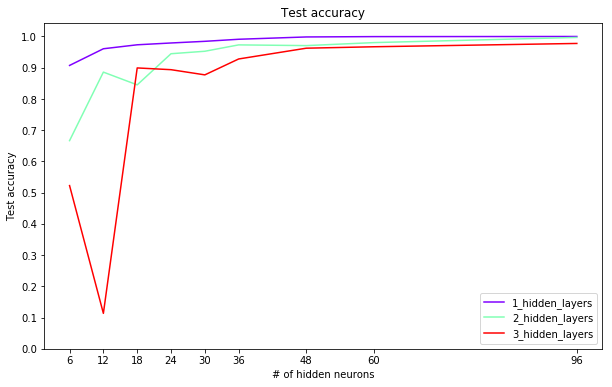

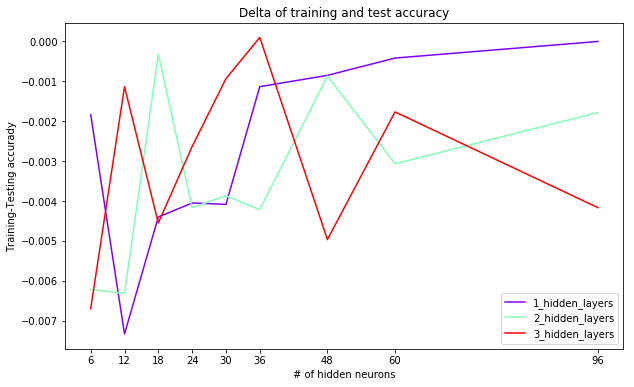

In [42]:
import matplotlib.cm as cm

color=iter(cm.rainbow(np.linspace(0,1,len(hidden_unit_numbers))))
fig, ax = plt.subplots()
for i,hd_key in enumerate(hidden_unit_numbers):
    ax.plot(hidden_unit_ints, 
                    training_accuracies[hd_key], label=hd_key,
                    color=next(color))   
ax.legend() 
ax.set_title("Training accuracy")   
ax.set_xlabel("# of hidden neurons")
ax.set_ylabel("Training accuracy")
ax.set_xticks(hidden_unit_ints)
ax.set_yticks([i/10 for i in range(0,11)])
plt.show()

color=iter(cm.rainbow(np.linspace(0,1,len(hidden_unit_numbers))))
fig, ax = plt.subplots()
for hd_key in hidden_unit_numbers:
    ax.plot(hidden_unit_ints, 
                    test_accuracies[hd_key], 
                    label=hd_key, color=next(color)) 
ax.legend()
ax.set_title("Test accuracy")
ax.set_xlabel("# of hidden neurons")
ax.set_ylabel("Test accuracy")
ax.set_xticks(hidden_unit_ints)
ax.set_yticks([i/10 for i in range(0,11)])
plt.show()

color=iter(cm.rainbow(np.linspace(0,1,len(hidden_unit_numbers))))
fig, ax = plt.subplots()
for i,hd_key in enumerate(hidden_unit_numbers):
    ax.plot(hidden_unit_ints, 
                    del_accuracies[hd_key], label=hd_key,
                    color=next(color))   
ax.legend() 
ax.set_title("Delta of training and test accuracy")   
ax.set_xlabel("# of hidden neurons")
ax.set_ylabel("Training-Testing accurady")
ax.set_xticks(hidden_unit_ints)
plt.show()